# Proyek Analisis Data: Kualitas air udara
- Nama: Herman effendi
- Email: hermaneffendi0502@gmail.com
- Id Dicoding: hrmneffdi

##  Background



Kualitas udara merupakan salah satu unsur yang penting dalam aspek kesehatan manusia. Kualitas udara khususnya yang kurang baik, akan memiliki dampak yang serius terhadap kesehatan manusia seperti gangguan pernapasan, penyakit jantung, dan juga kematian. Oleh karena itu, pemahaman yang baik tentang kualitas sangat penting dalam menunjang aspek kesehatan manusia. Untuk menunjang pemahaman tersebut, tentu dibutuhkan sumber dataset yang memadai. Saya berterima kasih kepada platform [_Dicoding_](https://www.dicoding.com/) karena telah menyediakan dataset yang diperlukan untuk menunjang kebutuhan analisis ini. Berikut penjelasan tiap variabel dari dataset yang ada :
1. **Year (Tahun):** Tahun pengukuran.
2. **Month (Bulan):** Bulan pengukuran.
3. **Day (Hari):** Tanggal pengukuran.
4. **Hour (Jam):** Jam pengukuran.
5. **PM2.5:** Konsentrasi partikulat matter dengan diameter kurang dari 2,5 mikrometer dalam µg/m³.
6. **PM10:** Konsentrasi partikulat matter dengan diameter kurang dari 10 mikrometer dalam µg/m³.
7. **SO2 (Sulfur Dioxide):** Konsentrasi sulfur dioksida dalam udara dalam µg/m³.
8. **NO2 (Nitrogen Dioxide):** Konsentrasi nitrogen dioksida dalam udara dalam µg/m³.
9. **CO (Carbon Monoxide):** Konsentrasi karbon monoksida dalam udara dalam µg/m³.
10. **O3 (Ozone):** Konsentrasi ozon dalam udara dalam µg/m³.
11. **TEMP (Temperature):** Temperatur udara dalam derajat Celsius.
12. **PRES (Pressure):** Tekanan atmosfer dalam hPa (hektopaskal).
13. **DEWP (Dew Point):** Titik embun, yaitu suhu di mana udara akan jenuh dengan uap air dan embun mulai terbentuk.
14. **RAIN (Rainfall):** Curah hujan dalam mm (milimeter).
15. **wd (Wind Direction):** Arah angin pada saat pengukuran.
16. **WSPM (Wind Speed):** Kecepatan angin dalam m/s (meter per detik).
17. **station:** Nama stasiun pengukuran polusi udara atau lokasi pengukuran.

Dalam konteks ini, saya membuat projek data science yang bertujuan untuk mengenali kondisi udara yang ada berdasarkan jam. Sebagai contoh, saya akan mengelompokkan data berdasarkan variabel PM2.5, PM10, N02 dan O3. Setelah itu, setidaknya akan diketahui pada kelompok variabel apa yang memiliki konsentrasi paling tinggi sehingga bisa muncul tindakan rekomendasi dari informasi yang didapat. Di dalam pengetahuan kualitas udara, ada beberapa kategori yang bisa dijadikan acuan untuk menilai seberapa baik kualitas udara yang ada. Berikut merupakan kategori kualitas udara menurut website _https://www.accuweather.com/_ :

 - 0 - 19 µg/m³ : _Excellent, The air quality is ideal for most individuals; enjoy your normal outdoor activities._

- 20 - 49 µg/m³ : _Fair, The air quality is generally acceptable for most individuals. However, sensitive groups may experience minor to moderate symptoms from long-term exposure._

- 50 - 99 µg/m³ : _Poor, The air has reached a high level of pollution and is unhealthy for sensitive groups. Reduce time spent outside if you are feeling symptoms such as difficulty breathing or throat irritation._

- 100 - 149 µg/m³ : _Unhealthy, Health effects can be immediately felt by sensitive groups. Healthy individuals may experience difficulty breathing and throat irritation with prolonged exposure. Limit outdoor activity._

## Menentukan Pertanyaan Bisnis

- Bagaimana pola perubahan konsentrasi PM2.5, PM10, NO2, dan O3 pada tiap jam?
- Apakah terdapat perbedaan yang signifikan dalam kualitas udara antara jam-jam tertentu dalam sehari?
- Dalam konteks kesehatan, bagaimana hasil analisis ini dapat digunakan untuk memberikan rekomendasi atau peringatan kepada masyarakat pada jam-jam tertentu ketika kualitas udara cenderung buruk?


## Menyiapkan semua library yang dibutuhkan

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

Dalam data gathering, saya mengumpulkan semua dataset yang berada di tiap stasiun. Lalu saya membuat dataframe PM2.5, PM10, NO2, dan O3 sebagai wadah untuk data PM2.5, PM10, NO2, dan O3 dari tiap stasiun.

In [7]:
Aotizhongxin = pd.read_csv('data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
Changping = pd.read_csv('data/PRSA_Data_Changping_20130301-20170228.csv')
Dingling = pd.read_csv('data/PRSA_Data_Dingling_20130301-20170228.csv')
Dongsi = pd.read_csv("data/PRSA_Data_Dongsi_20130301-20170228.csv")
Guanyuan = pd.read_csv("data/PRSA_Data_Guanyuan_20130301-20170228.csv")
Gucheng = pd.read_csv("data/PRSA_Data_Gucheng_20130301-20170228.csv")
Huairou = pd.read_csv("data/PRSA_Data_Huairou_20130301-20170228.csv")
Nongzhanguan = pd.read_csv("data/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
Shunyi = pd.read_csv("data/PRSA_Data_Shunyi_20130301-20170228.csv")
Tiantan = pd.read_csv("data/PRSA_Data_Tiantan_20130301-20170228.csv")
Wanliu = pd.read_csv("data/PRSA_Data_Wanliu_20130301-20170228.csv")
Wanshouxigong = pd.read_csv("data/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

In [8]:
# mengumpulkan semua data keseluruhan dari tiap stasiun
all_df = dict(Aotizhongxin = Aotizhongxin, Changping = Changping, Dingling = Dingling,
            Dongsi = Dongsi, Guanyuan = Guanyuan, Gucheng = Gucheng, Huairou = Huairou,
            Nongzhanguan = Nongzhanguan, Shunyi = Shunyi, Tiantan = Tiantan,
            Wanliu = Wanliu, Wanshouxigong = Wanshouxigong)

stasiun = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou',
           'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']

In [9]:
# membuat dataframe untuk tiap variabel yang akan dianalisis
PM2_5 = pd.DataFrame()
PM10 = pd.DataFrame()
NO2 = pd.DataFrame()
O3 = pd.DataFrame()

In [10]:
# mengumpulkan variabel uji lalu menambahkan nilai hour
data = dict(PM2_5 = PM2_5, PM10 = PM10, NO2 = NO2, O3 = O3)

for datum in data:
    data[datum]["hour"] = Dongsi["hour"]

PM10.head()

,hour
0,0
1,1
2,2
3,3
4,4


In [11]:
# mengelompokkan nilai variabel yang dianalisis dari tiap stasiun
for df in all_df:
    for datum in data:
        if datum == "PM2_5" :
            data[datum][df] = all_df[df]["PM2.5"]
        else:
            data[datum][df] = all_df[df][datum]

O3.head()

,hour,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
0,0,77.0,85.0,82.0,89.0,69.0,88.0,91.0,85.0,44.0,81.0,52.0,62.0
1,1,77.0,85.0,80.0,88.0,72.0,88.0,92.0,84.0,47.0,80.0,50.0,66.0
2,2,73.0,74.0,79.0,60.0,69.0,52.0,91.0,83.0,22.0,75.0,55.0,59.0
3,3,72.0,81.0,79.0,NaN,62.0,NaN,NaN,84.0,NaN,74.0,NaN,NaN
4,4,72.0,81.0,81.0,84.0,71.0,73.0,86.0,77.0,11.0,70.0,54.0,36.0


### Assessing Data

#### Missing values

Terlihat bahwa banyak data yang hilang untuk tiap variabel, hal yang paling baik dilakukan yaitu mengisi nilai yang hilang. Sebelum mengisi nilai yang sesuai, lebih baiknya kita memperhatikan summary statistic dari tiap variabel.

In [12]:
for datum in data:
    print(f"jumlah missing value {datum} dari tiap stasiun")
    print(data[datum].isna().sum(),"\n")

jumlah missing value PM2_5 dari tiap stasiun
hour               0
Aotizhongxin     925
Changping        774
Dingling         779
Dongsi           750
Guanyuan         616
Gucheng          646
Huairou          953
Nongzhanguan     628
Shunyi           913
Tiantan          677
Wanliu           382
Wanshouxigong    696
dtype: int64 

jumlah missing value PM10 dari tiap stasiun
hour               0
Aotizhongxin     718
Changping        582
Dingling         656
Dongsi           553
Guanyuan         429
Gucheng          381
Huairou          777
Nongzhanguan     440
Shunyi           548
Tiantan          597
Wanliu           284
Wanshouxigong    484
dtype: int64 

jumlah missing value NO2 dari tiap stasiun
hour                0
Aotizhongxin     1023
Changping         667
Dingling         1234
Dongsi           1601
Guanyuan          659
Gucheng           668
Huairou          1639
Nongzhanguan      692
Shunyi           1365
Tiantan           744
Wanliu           1070
Wanshouxigong     754
dtype:

#### Data duplicated

Untuk tiap topik, terlihat juga memiliki baris yang terindisikasi duplikat. untuk itu mari kita cek baris apa yang terindikasi sebagai duplikat. Ternyata, nilai yang duplikat terindikasi karena sama-sama memiliki nilai yang missing value.

In [13]:
for datum in data:
    print(f"jumlah data duplicated {datum} dari tiap stasiun")
    print(data[datum].duplicated().sum(),"\n")

jumlah data duplicated PM2_5 dari tiap stasiun
58 

jumlah data duplicated PM10 dari tiap stasiun
61 

jumlah data duplicated NO2 dari tiap stasiun
64 

jumlah data duplicated O3 dari tiap stasiun
127 



In [14]:
O3.loc[O3.duplicated() == True]

,hour,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
8340,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8659,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8661,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8662,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8678,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34587,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34863,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34864,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34866,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning Data

#### Summary statistic

Pada kuartal 3 sampai kuartal 4, nilai di semua stasiun cenderung meningkat tajam, hal ini bisa mengindikasikan adanya distribusi yang skew ke kanan dan juga mengindikasikan adanya outlier sehingga langkah yang paling baik untuk imputasi yaitu dengan **median**, karena median tidak terpengaruhi oleh outlier seperti halnya mean.

##### PM2_2

In [15]:
PM2_5.describe()

,hour,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
count,35064.000000,34139.000000,34290.000000,34285.000000,34314.000000,34448.000000,34418.000000,34111.000000,34436.000000,34151.000000,34387.000000,34682.000000,34368.000000
mean,11.500000,82.773611,71.099743,65.989497,86.194297,82.933372,83.852089,69.626367,84.838483,79.491602,82.164911,83.374716,85.024136
std,6.922285,82.135694,72.326926,72.267723,86.575127,80.933497,82.796445,71.224916,86.225344,81.231739,80.921384,81.905568,85.975981
min,0.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000
25%,5.750000,22.000000,18.000000,14.000000,22.000000,23.000000,24.000000,17.000000,22.000000,19.000000,22.000000,23.000000,23.000000
50%,11.500000,58.000000,46.000000,41.000000,61.000000,59.000000,60.000000,47.000000,59.000000,55.000000,59.000000,59.000000,60.000000
75%,17.250000,114.000000,100.000000,93.000000,119.000000,115.000000,115.750000,98.000000,116.000000,112.000000,113.000000,116.000000,116.000000
max,23.000000,898.000000,882.000000,881.000000,737.000000,680.000000,770.000000,762.000000,844.000000,941.000000,821.000000,957.000000,999.000000


##### PM10

In [16]:
PM10.describe()

,hour,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
count,35064.000000,34346.000000,34482.000000,34408.000000,34511.000000,34635.000000,34683.000000,34287.000000,34624.000000,34516.000000,34467.000000,34780.000000,34580.000000
mean,11.500000,110.060391,94.657871,83.739723,110.336742,109.023303,118.861978,91.482690,108.991096,98.737026,106.363672,110.464618,112.223459
std,6.922285,95.223005,83.441738,79.541685,98.219860,91.573709,96.742626,83.289578,95.341177,89.143718,89.700157,92.795065,97.593210
min,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,5.750000,38.000000,34.000000,26.000000,38.000000,40.000000,45.000000,28.000000,38.000000,31.000000,41.000000,40.000000,39.000000
50%,11.500000,87.000000,72.000000,60.000000,86.000000,89.000000,99.000000,69.000000,85.000000,77.000000,85.000000,88.000000,91.000000
75%,17.250000,155.000000,131.000000,117.000000,151.000000,149.000000,167.000000,131.000000,149.000000,138.000000,144.000000,153.000000,154.000000
max,23.000000,984.000000,999.000000,905.000000,955.000000,999.000000,994.000000,993.000000,995.000000,999.000000,988.000000,951.000000,961.000000


##### NO2

In [17]:
NO2.describe()

,hour,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
count,35064.000000,34041.000000,34397.000000,33830.000000,33463.000000,34405.000000,34396.000000,33425.000000,34372.000000,33699.000000,34320.000000,33994.000000,34310.00000
mean,11.500000,59.305833,44.182086,27.585467,53.699443,57.901643,55.871075,32.497250,58.097172,43.908865,53.162646,65.258789,55.52956
std,6.922285,37.116200,29.519796,26.383882,33.959230,35.150857,36.473860,26.489531,36.297740,30.996828,31.946224,37.996088,35.80805
min,0.000000,2.000000,1.847700,1.026500,2.000000,2.000000,2.000000,1.026500,2.000000,2.000000,2.000000,1.642400,2.00000
25%,5.750000,30.000000,22.000000,9.000000,27.000000,31.000000,26.000000,12.000000,29.000000,19.000000,28.000000,36.000000,28.00000
50%,11.500000,53.000000,36.000000,19.000000,47.000000,51.000000,50.000000,25.000000,51.000000,37.000000,47.000000,60.000000,49.00000
75%,17.250000,82.000000,60.358200,38.000000,73.000000,78.000000,79.000000,46.000000,80.000000,62.000000,71.000000,88.000000,77.00000
max,23.000000,290.000000,226.000000,205.000000,258.000000,270.000000,276.000000,231.000000,273.000000,258.000000,241.000000,264.000000,251.00000


##### O3

In [18]:
O3.describe()

,hour,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
count,35064.000000,33345.000000,34460.000000,33850.000000,34400.000000,33891.000000,34335.000000,33913.000000,34558.000000,33575.000000,34221.000000,32957.000000,33986.000000
mean,11.500000,56.353358,57.940003,68.548371,57.210637,55.795044,57.694879,59.824713,58.534682,55.201321,55.984297,48.873614,56.229904
std,6.922285,57.916327,54.316674,53.764424,58.033275,57.436983,57.019587,54.605746,58.401448,54.873726,59.081528,55.111740,57.082710
min,0.000000,0.214200,0.214200,0.214200,0.642600,0.214200,0.214200,0.214200,0.214200,0.214200,0.428400,0.214200,0.214200
25%,5.750000,8.000000,15.636600,31.000000,12.000000,7.000000,10.000000,18.000000,10.000000,10.000000,8.000000,4.000000,8.000000
50%,11.500000,42.000000,46.000000,61.000000,44.125200,41.000000,45.000000,49.000000,45.000000,43.000000,40.000000,32.000000,42.000000
75%,17.250000,82.000000,80.000000,90.000000,81.000000,81.000000,83.000000,83.000000,84.000000,77.000000,81.000000,73.000000,82.000000
max,23.000000,423.000000,429.000000,500.000000,1071.000000,415.000000,450.000000,444.000000,390.000000,351.716400,674.000000,364.000000,358.000000


#### Imputation dengan median


In [19]:
for datum in data:
    for i in stasiun:
        data[datum][i] = data[datum][i].fillna(data[datum][i].median())

In [20]:
for datum in data:
    print(f"jumlah missing value {datum} dari tiap stasiun")
    print(data[datum].isna().sum(),"\n")

jumlah missing value PM2_5 dari tiap stasiun
hour             0
Aotizhongxin     0
Changping        0
Dingling         0
Dongsi           0
Guanyuan         0
Gucheng          0
Huairou          0
Nongzhanguan     0
Shunyi           0
Tiantan          0
Wanliu           0
Wanshouxigong    0
dtype: int64 

jumlah missing value PM10 dari tiap stasiun
hour             0
Aotizhongxin     0
Changping        0
Dingling         0
Dongsi           0
Guanyuan         0
Gucheng          0
Huairou          0
Nongzhanguan     0
Shunyi           0
Tiantan          0
Wanliu           0
Wanshouxigong    0
dtype: int64 

jumlah missing value NO2 dari tiap stasiun
hour             0
Aotizhongxin     0
Changping        0
Dingling         0
Dongsi           0
Guanyuan         0
Gucheng          0
Huairou          0
Nongzhanguan     0
Shunyi           0
Tiantan          0
Wanliu           0
Wanshouxigong    0
dtype: int64 

jumlah missing value O3 dari tiap stasiun
hour             0
Aotizhongxin     0
Ch

Terlihat bahwa tidak ada mising values lagi, lalu setelah ini, mari kita drop data duplicated

#### Drop duplicated

In [21]:
for datum in data:
    data[datum].drop_duplicates(inplace=True)
    data[datum].reset_index(inplace=True)
    data[datum].drop('index', axis=1, inplace=True)

In [22]:
for datum in data:
    print(f"jumlah data duplicated {datum} dari tiap stasiun")
    print(data[datum].duplicated().sum(),"\n")

jumlah data duplicated PM2_5 dari tiap stasiun
0 

jumlah data duplicated PM10 dari tiap stasiun
0 

jumlah data duplicated NO2 dari tiap stasiun
0 

jumlah data duplicated O3 dari tiap stasiun
0 



#### Handling outlier




Untuk handling outlier, saya menggunakan rumus yang biasanya dipakai yaitu :

\begin{align*}
\text{Lower Bound} &= Q1 - k \cdot \text{IQR} \\
\text{Upper Bound} &= Q3 + k \cdot \text{IQR}
\end{align*}

dengan syarat:

$$ x \geq \text{Lower Bound} $$

$$ x \leq \text{Upper Bound} $$

In [23]:
def handling_outlier(dataframe, kolom):
    q1 = dataframe[kolom].quantile(0.25)
    q3 = dataframe[kolom].quantile(0.75)
    iqr = q3 - q1

    minimum = q1 - iqr * 1.5
    maximum = q3 + iqr * 1.5

    cleaned = dataframe.loc[(dataframe[kolom] >= minimum) & (dataframe[kolom] <= maximum)]
    cleaned.reset_index(drop=True, inplace=True)
    return cleaned

In [24]:
for datum in data:
  for st in stasiun:
    data[datum] = handling_outlier(data[datum], st)

## Exploratory Data Analysis (EDA)

#### Univariate

Pada tahap ini, saya akan mengeksplorasi distribusi variabel yang ada disetiap stasiun untuk mengetahui seberapa banyak daerah densitas yang melanggar batas yang telah ditentukan. Saya memilih batas paling tak wajar yaitu diangka 100 µg/m³, karena masuk ke dalam kategori _unhealthy_ yang dapat mengakibatkan gangguan kesehatan secara signifikan, dan juga saya mengukur data secara keseluruhan sehingga batas yang agak besar bisa dijadikan opsi paling baik.

##### Distribusi O3 tiap stasiun

Dari grafik yang ada, selalu ada stasiun yang melanggar batas wajar terutama stasiun Dongsi.

C:\Users\User\AppData\Local\Temp\ipykernel_4500\3755198918.py:9: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, 400, 50)


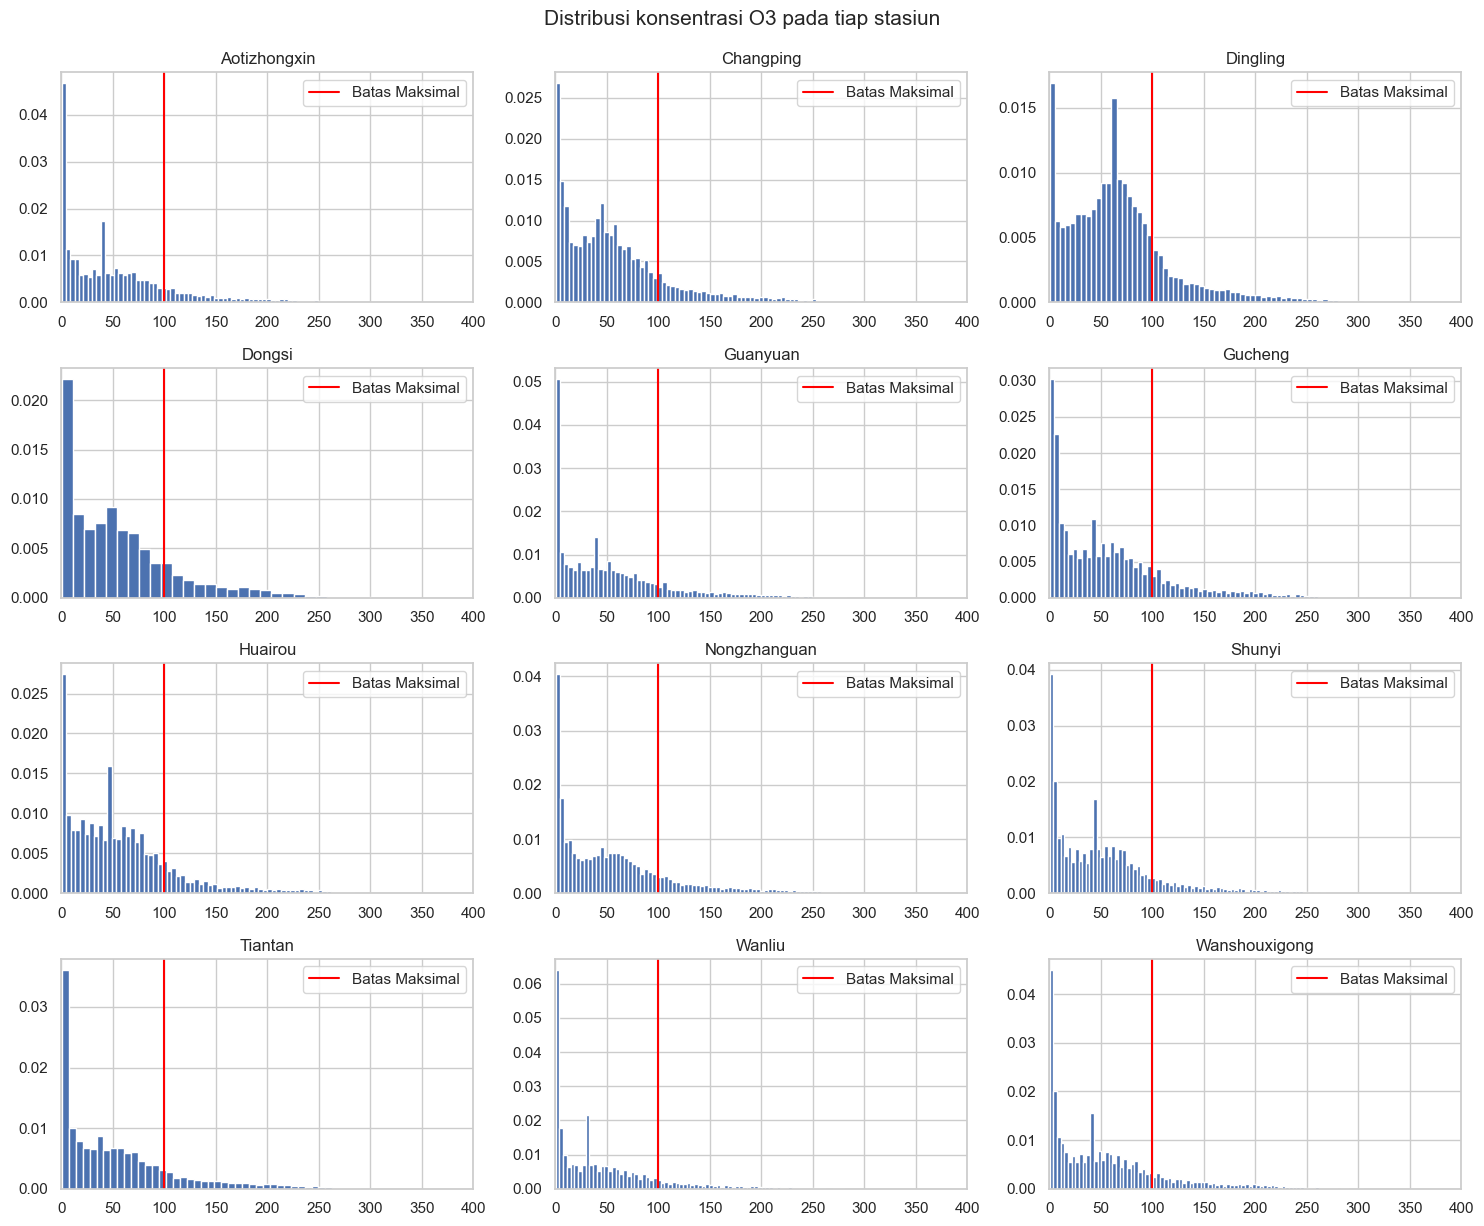

In [25]:
num = 1
plt.figure(figsize=(15, 12))
for i in all_df:
    plt.subplot(4, 3, num)
    plt.hist(O3[i], bins=100, density = True)
    plt.axvline(x=100, color='red', linestyle='-', label='Batas Maksimal')
    plt.title(f"{i}")
    plt.legend()
    plt.xlim(0, 400, 50)
    num +=1

plt.tight_layout()
plt.suptitle("Distribusi konsentrasi O3 pada tiap stasiun",  y=1.02, size = 15)
plt.show()

##### Distribusi PM2.5

Jika dilihat dari grafik, mayoritas stasiun juga menunjukkan adanya pelanggaran batas dalam skala yang sangat besar.

C:\Users\User\AppData\Local\Temp\ipykernel_4500\3773065556.py:7: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, 400, 50)


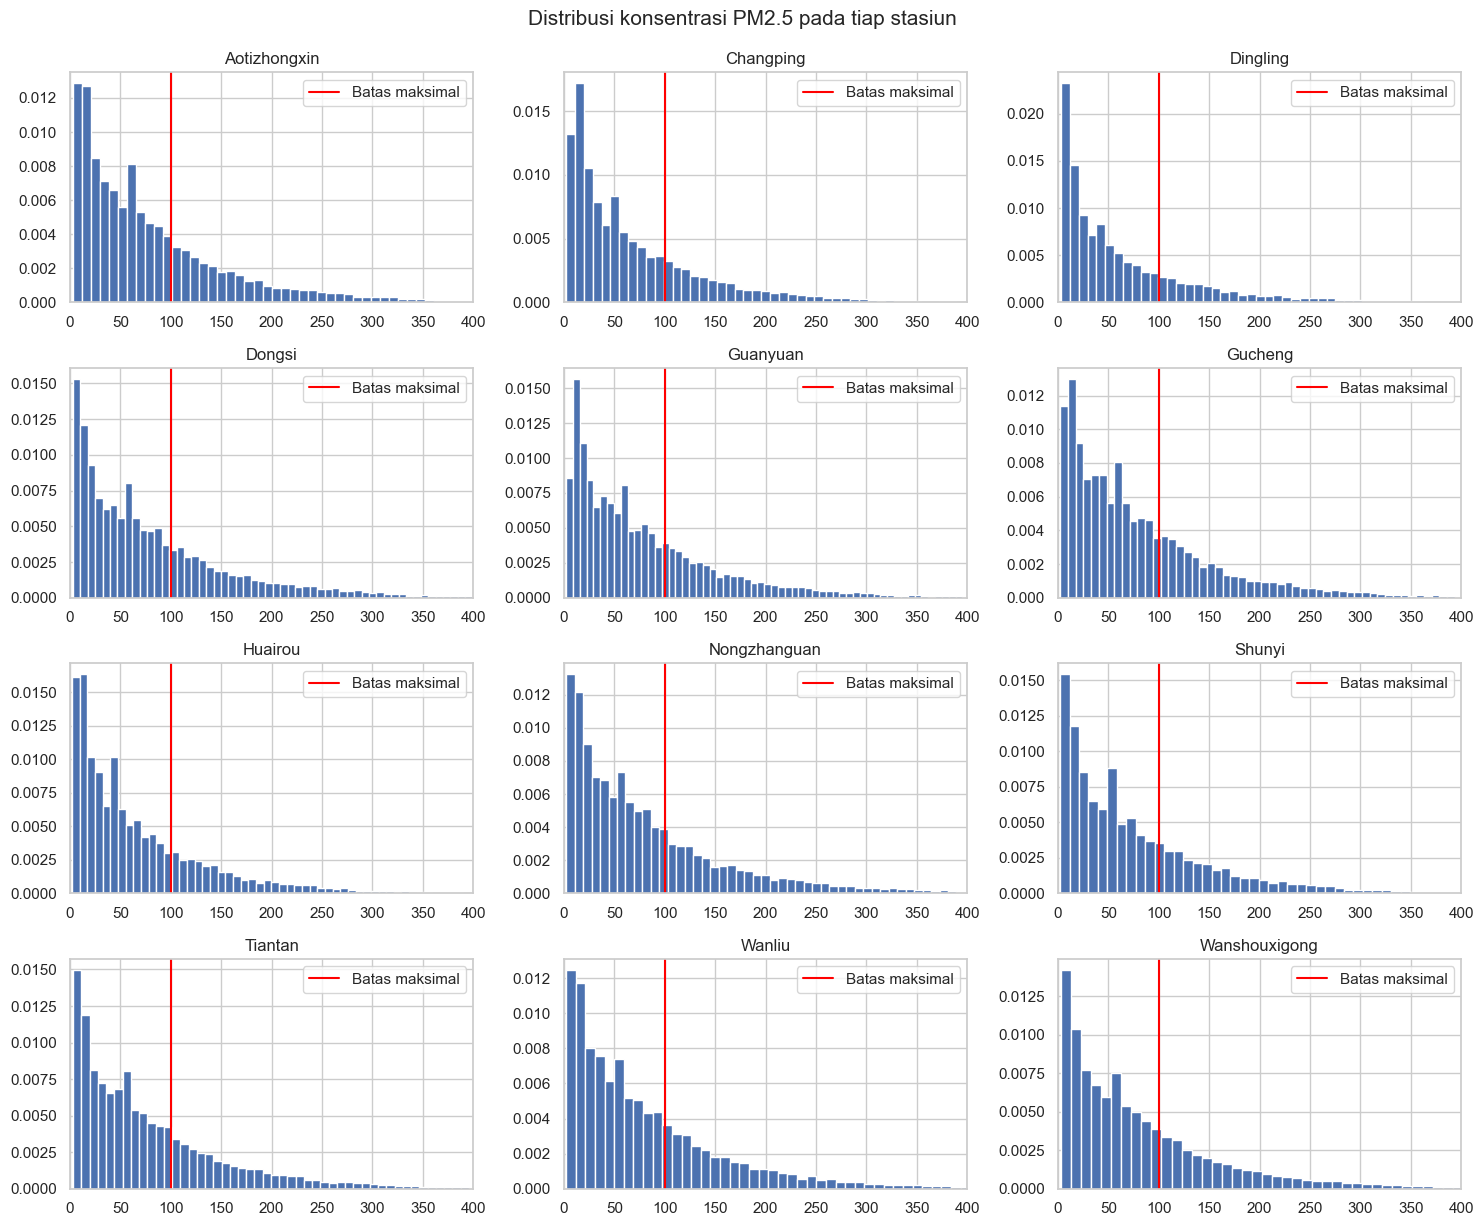

In [26]:
num = 1
plt.figure(figsize=(15, 12))
for i in all_df:
    plt.subplot(4, 3, num)
    plt.hist(PM2_5[i], bins=100, density=True)
    plt.axvline(x=100, color="red", label="Batas maksimal", linestyle="-")
    plt.xlim(0, 400, 50)
    plt.title(f"{i}")
    plt.legend()
    num +=1

plt.tight_layout()
plt.suptitle("Distribusi konsentrasi PM2.5 pada tiap stasiun",  y=1.02, size = 15)
plt.show()

##### Distribusi PM10

Batas untuk PM10 yaitu 100 µg/m³. Menurut grafik pun terlihat jika semua stasiun melanggar batas yang ditentukan.


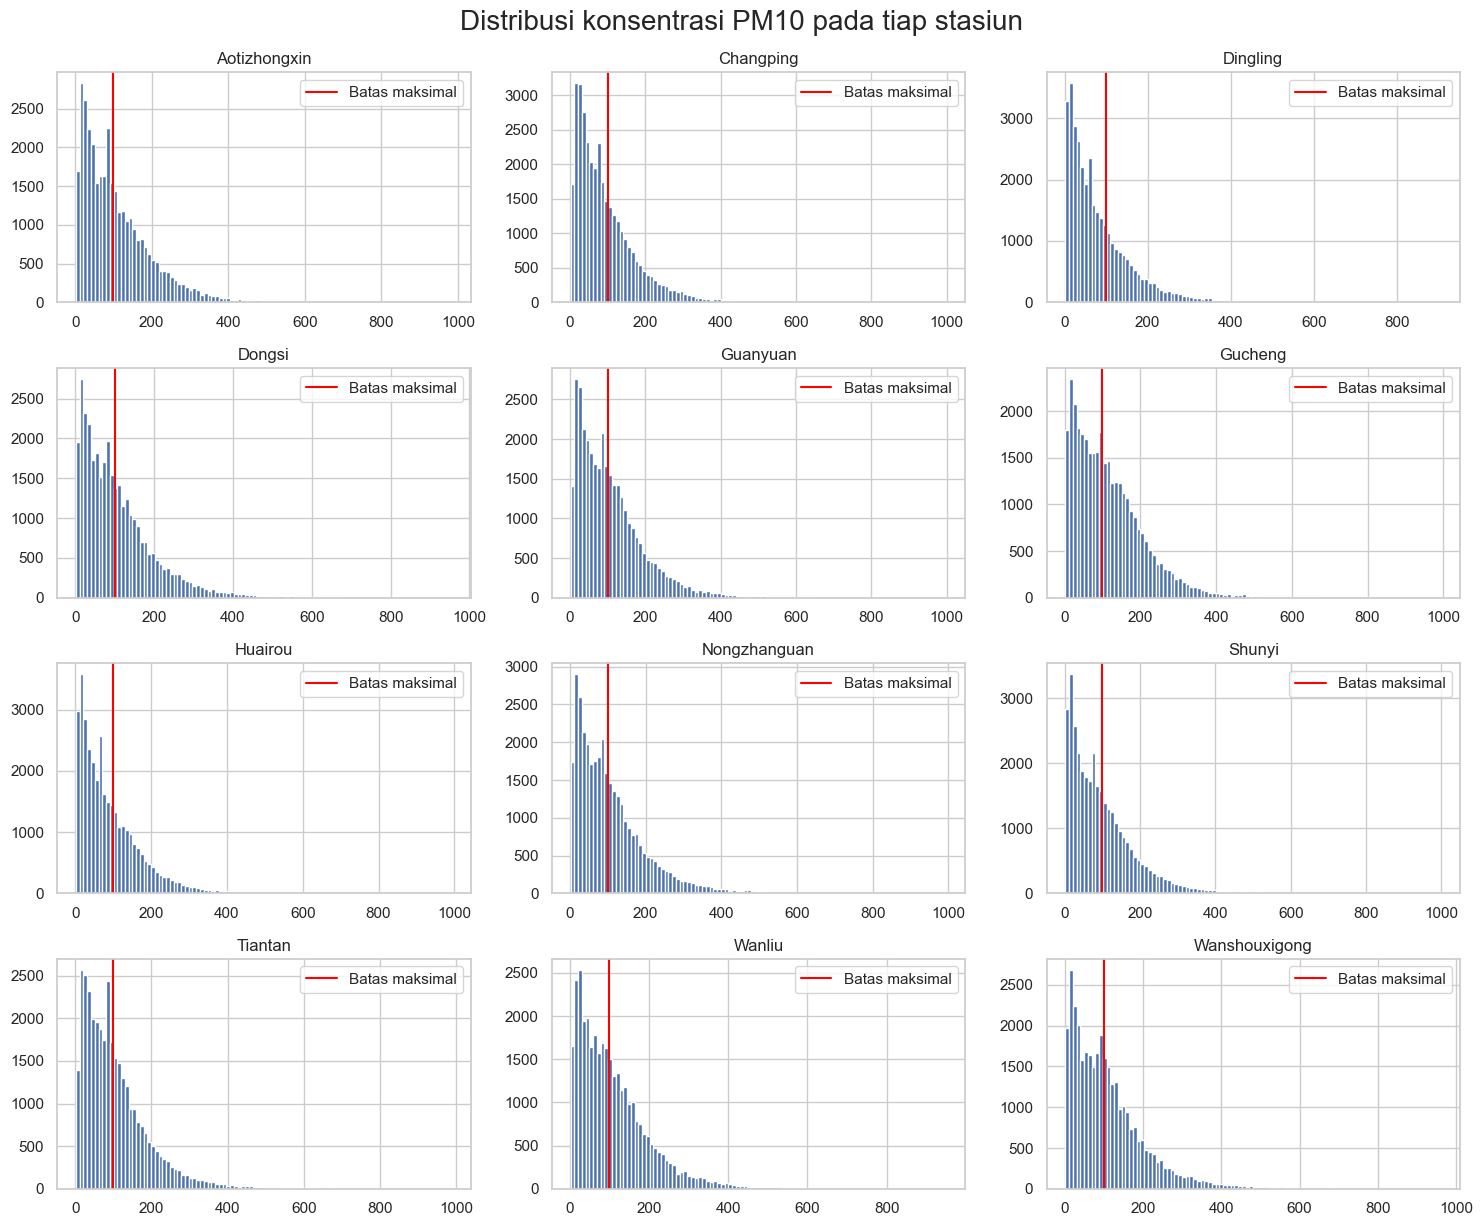

In [27]:
num = 1
plt.figure(figsize=(15, 12))
for i in all_df:
    plt.subplot(4, 3, num)
    plt.hist(PM10[i], bins=100)
    plt.axvline(x=100, color='red', label="Batas maksimal", linestyle="-")
    plt.title(f"{i}")
    plt.legend()
    num +=1

plt.tight_layout()
plt.suptitle("Distribusi konsentrasi PM10 pada tiap stasiun",  y=1.02, size = 20)
plt.show()

##### Distribusi NO2
Batas untuk NO2 yaitu 100 µg/m³. Jika dilihat dari grafik, terlihat bahwa semua stasiun melanggar grafik. Tetapi, stasiun Dingling dan Huairou menunjukkan pelanggaran yang paling sedikit.


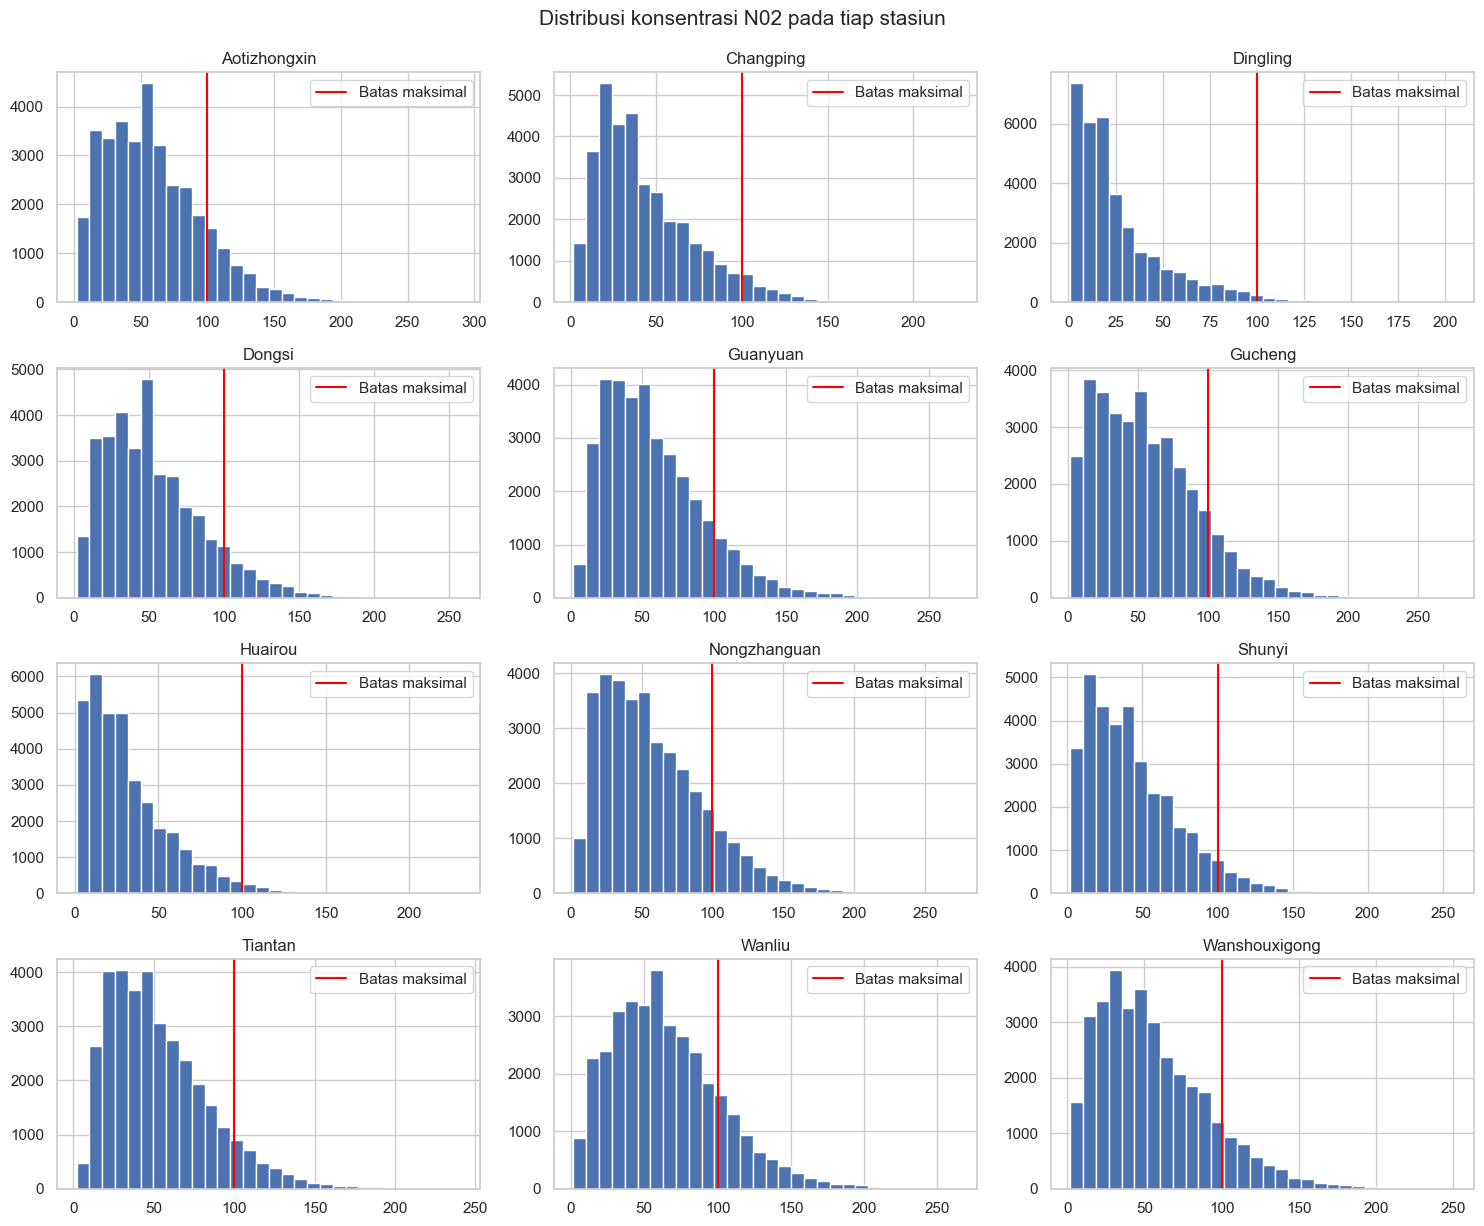

In [28]:
num = 1
plt.figure(figsize=(15, 12))
for i in all_df:
    plt.subplot(4, 3, num)
    plt.hist(NO2[i], bins=30)
    plt.axvline(x=100, color="red", linestyle="-", label="Batas maksimal")
    plt.legend()
    plt.title(f"{i}")
    num +=1

plt.tight_layout()
plt.suptitle("Distribusi konsentrasi N02 pada tiap stasiun",  y=1.02, size = 15)
plt.show()

##### Kesimpulan dari grafik histogram yang telah ditampilkan, tiap stasiun selalu ada bagian yang melanggar batas maksimal kategori _unhealthty_ (parah) tapi hanya dalam jumlah yang kecil. Akan tetapi, tetap saja kualitas udara yang dibawah kategori _unhealthy_ masih mendominasi.

#### Bivariate

Pada tahap ini, saya akan mengeksplorasi hubungan dari dua variabel secara bersamaan. Mulai dari hubungan antara PM10 dan PM2.5 hingga PM10 dan hour.
Saya akan mengambil stasiun Shunyi sebagai contoh dari setiap hubungan yang akan dieksplorasi. Mengapa memilih Shunyi? Karena karakteristik dari stasiun Shunyi itu selalu konsisten dalam melanggar batas yang ditetapkan sehingga saya rasa stasiun Shunyi bisa dianggap mewakili karakteristik dari semua stasiun yang ada.

##### Hubungan korelasi antara semua indikator di stasiun Wanliu



Dari grafik heatmap yang didapat, ada beberapa informasi yang bisa diambil diantaranya sebagai berikut:

- PM2.5 dan PM10 mengindikasikan adanya korelasi yang cukup kuat diantara keduanya dengan nilai 0.82 .
- PM10 dan NO2 menandakan adanya korelasi yang sedang, yaitu diangka 0.56.
- PM2.5 dan NO2 juga demikian dengan nilai korelasi diangka 0.52.
- Untuk O3, menunjukkan korelasi negatif diantara semua variabel.

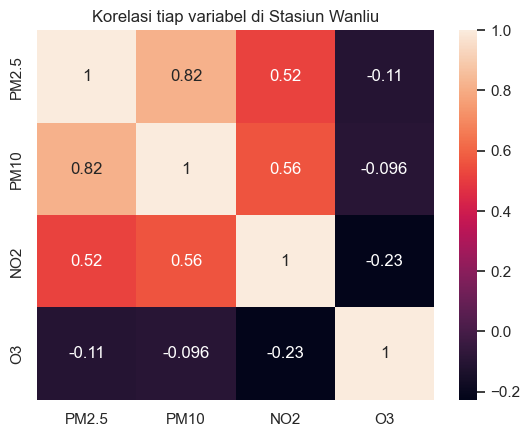

In [29]:
dic = {"PM2.5" : PM2_5['Wanliu'],
       "PM10" : PM10["Wanliu"],
       "NO2" : NO2["Wanliu"],
       "O3" : O3["Wanliu"]}
corr = pd.DataFrame(dic)
corr = corr.corr()
sns.heatmap(corr, annot=True)
plt.title("Korelasi tiap variabel di Stasiun Wanliu")
plt.show()

##### Hubungan tiap variabel terhadap jam di stasiun Shunyi

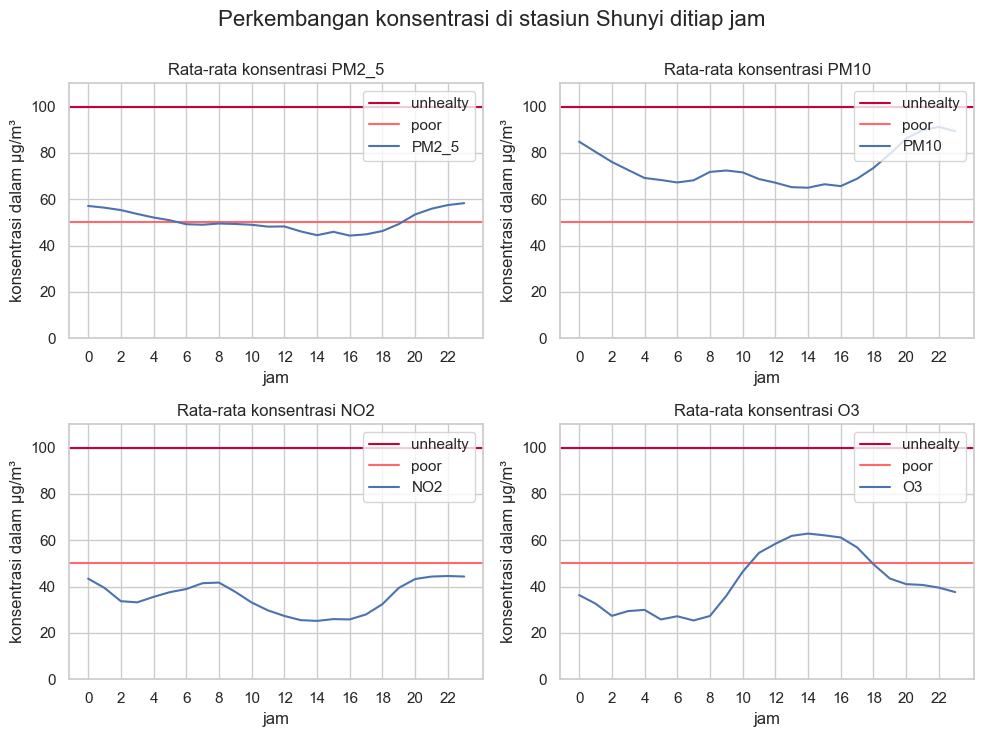

In [30]:
num = 1
plt.figure(figsize=(10, 7))
for datum in data:
    plt.subplot(2,2,num)
    sample = data[datum].groupby("hour")["Shunyi"].mean()
    x = sample.index
    y = sample.values
    plt.axhline(y=100, color = "#C70039", label="unhealty")
    plt.axhline(y=50, color = "#FF6969", label="poor")
    plt.plot(x, y, label = datum)
    plt.ylim(0,110)
    plt.xticks(range(0,23,2))
    plt.legend(loc='upper right')
    plt.title(f"Rata-rata konsentrasi {datum}")
    plt.xlabel("jam")
    plt.ylabel("konsentrasi dalam µg/m³")
    num +=1

plt.tight_layout()
plt.suptitle("Perkembangan konsentrasi di stasiun Shunyi ditiap jam", y=1.05, size=16)
plt.show()

Dari grafik lineplot yang ada, terdapat beberapa informasi
yang bisa diambil diantaranya sebagai berikut :

- Untuk konsentrasi PM2.5 selalu berada pada kategori poor.
Terlihat bahwa terjadi penurunan dari pukul 0 sampai pukul 16. Akan tetapi, mengalami kenaikan pada puku 18 sampai pukul 23.
- Untuk konsentrasi PM10 juga berada dikategori poor.
Terlihat bahwa terjadi penurunan pada pukul 0 sampai 16 dan juga mengalami
kenaikan pada pukul 18. Pola yang ada sama seperti konsentrasi
PM2.5.
-Untuk konsentrasi NO2, terjadi pola naik turun dimana pada pukul 0 sampai 3 itu terjadi penurunan dan naik pada pukul 4. Setelah itu, terjadi penurunan kembali pada pukul 8 dan 18 dan terjadi kenaikan lagi pada pukul 19 sampai pukul 23.
- Untuk konsentrasi O3, pada pukul 0 sampai 8 berada di bawah
kategori poor, tetapi pada pukul 9 mengalami kenaikan
signifikan hingga melewati kategori poor dan turun kembali pada
pukul 18


##### Kesimpulan yang bisa diambil yaitu pola kenaikan dan penurunan PM2.5, PM10, dan NO2 itu sama. Turun pada pukul 10 sampai pukul 16 dan mengalami kenaikan pada pukul selanjutnya. Hal ini berbanding terbalik pada O3, yang mengalami kenaikan pada pukul 10 sampai pukul 16 dan mengalami penurunan pada pukul selanjutnya.

## Model Building and Evaluation

### Teknik Clustering

#### Penjelasan

Pada tahap ini, saya akan melakukan teknik clustering dimana cara ini digunakan untuk mengetahui kelompok-kelompok data berdasarkan karakteristiknya. Saya ingin mengelompokkan tiap-tiap polutan berdasarkan provinsinya, lalu dari itu, saya bisa mengetahui kelompok kluster hasil dari prediksi.


Sebelum menggunakan teknik clustering, saya akan memilih stasiun yang ada agar penjelasan cluster yang saya analisis bisa terpaparkan secara spesifik. Untuk stasiun yang ada, saya memilih stasiun Dingling sebagai stasiun yang akan saya cluster.

#### Clustering

Pada tahap ini, saya akan mengampil nilai dari tiap polutan PM2.5, PM10, NO2, dan Ozon pada stasiun Dingling.

In [31]:
data_cluster = Dingling[["hour", "PM2.5", "PM10", "NO2", "O3"]] # seleksi kolom

for col in data_cluster.columns:
  median = data_cluster[col].median()
  data_cluster[col] = data_cluster[col].fillna(median)

data_cluster.isna().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_4500\2073170805.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster[col] = data_cluster[col].fillna(median)
C:\Users\User\AppData\Local\Temp\ipykernel_4500\2073170805.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster[col] = data_cluster[col].fillna(median)
C:\Users\User\AppData\Local\Temp\ipykernel_4500\2073170805.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

hour     0
PM2.5    0
PM10     0
NO2      0
O3       0
dtype: int64

Dalam menggunakan cluster, kita harus mendownload librarynya, yaitu scikit learn.

In [32]:
!pip install scikit-learn -q -q

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [34]:
# scaling data agar komputasi tidak berat

x = data_cluster.drop("hour", axis = 1)
x = StandardScaler().fit_transform(x)

Lnagsung saja, saya ingin menginisialisasi jumlah clusternya menjadi 3 agar mudah dikelompokkan dan diingat.

In [35]:
model = KMeans(n_clusters = 3)

y = model.fit_predict(x)
data_cluster["label"] = y
data_cluster["label"] = data_cluster["label"] + 1
data_cluster.head(3)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_4500\2157056852.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster["label"] = y
C:\Users\User\AppData\Local\Temp\ipykernel_4500\2157056852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

,hour,PM2.5,PM10,NO2,O3,label
0,0,4.0,4.0,19.0,82.0,3
1,1,7.0,7.0,19.0,80.0,3
2,2,5.0,5.0,2.0,79.0,3


In [36]:
data_cluster.loc[(data_cluster["label"] == 3)].head()

,hour,PM2.5,PM10,NO2,O3,label
0,0,4.0,4.0,19.0,82.0,3
1,1,7.0,7.0,19.0,80.0,3
2,2,5.0,5.0,2.0,79.0,3
3,3,6.0,6.0,19.0,79.0,3
4,4,5.0,5.0,19.0,81.0,3


In [37]:
for i in range(1, 4):
  for col in data_cluster.columns:
    mean = data_cluster.loc[(data_cluster["label"] == i), col].median()
    print(f"columns {col}, cluster {i}, rata-rata = {mean}")
  print("")

columns hour, cluster 1, rata-rata = 12.0
columns PM2.5, cluster 1, rata-rata = 156.0
columns PM10, cluster 1, rata-rata = 172.0
columns NO2, cluster 1, rata-rata = 66.0
columns O3, cluster 1, rata-rata = 15.0
columns label, cluster 1, rata-rata = 1.0

columns hour, cluster 2, rata-rata = 16.0
columns PM2.5, cluster 2, rata-rata = 83.0
columns PM10, cluster 2, rata-rata = 118.0
columns NO2, cluster 2, rata-rata = 20.0
columns O3, cluster 2, rata-rata = 156.0
columns label, cluster 2, rata-rata = 2.0

columns hour, cluster 3, rata-rata = 10.0
columns PM2.5, cluster 3, rata-rata = 22.0
columns PM10, cluster 3, rata-rata = 38.0
columns NO2, cluster 3, rata-rata = 14.0
columns O3, cluster 3, rata-rata = 61.0
columns label, cluster 3, rata-rata = 3.0



Dari hasil cluster yang didapat, diperoleh ringkasan seperti berikut :

- cluster 1:
  - Terjadi pada sekitar jam 12 siang.
  - Rata - rata polutan PM10 dan PM2.5 memiliki konsentrasi yang sedang tinggi-tingginya.

- cluster 2:
  - Terjadi pada sekitar jam 10 siang.
  - Rata - rata semua polutan pada level yang rendah.

- cluster 3:
  - Terjadi pada pukul 4 sore.
  - Rata-rata konsentrasi dari PM10 dan O3 berada pada level yang tinggi.


## Visualization & Explanatory Analysis

#### Pertanyaan 1:


- Bagaimana pola perubahan konsentrasi PM2.5, PM10, NO2, dan O3 pada tiap jam?


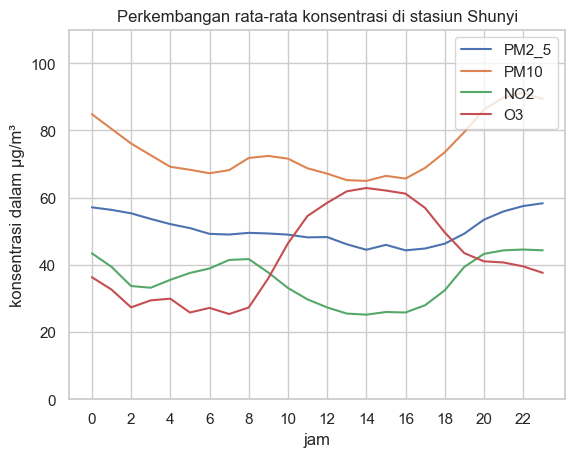

In [38]:
for datum in data:
    sample = data[datum].groupby("hour")["Shunyi"].mean()
    x = sample.index
    y = sample.values
    plt.plot(x, y, label = datum)
    plt.ylim(0,110)
    plt.xticks(range(0,23,2))
    plt.legend(loc='upper right')
    plt.xlabel("jam")
    plt.ylabel("konsentrasi dalam µg/m³")
    num +=1

plt.title("Perkembangan rata-rata konsentrasi di stasiun Shunyi")
plt.show()



Kita bisa menjawab bahwasanya PM2.5, PM10, dan NO2 mengalami kenaikan pada jam 10 siang sampai jam 4 sore dimana pada jam tersebut merupakan jam-jam produktif sehingga pantas saja PM2.5, PM10, dan NO2 mengalami kenaikan konsentrasi sehingga masuk ke dalam kategori _poor_. Tetapi terjadi hal yang sebaliknya terhadap O3.

#### Pertanyaan 2:

- Apakah terdapat perbedaan yang signifikan dalam kualitas udara antara jam-jam tertentu dalam sehari?

Ya, terdapat perbedaan yang signifikan terhadap kualitas udara diantara jam-jam tertentu dalam sehari. Perbedaan yang signifikan yaitu pada jam 10 siang terjadi kenaikan yang signifikan dan pada pukul 16 terjadi penurunan yang signifikan. Tetapi terjadi hal yang sebaliknya terhadap O3.


#### Pertanyaan 3:


- Dalam konteks kesehatan, bagaimana hasil analisis ini dapat digunakan untuk memberikan rekomendasi atau peringatan kepada masyarakat pada jam-jam tertentu ketika kualitas udara cenderung buruk?

Pada dasarnya, hasil analisis ini menunjukkan pola menarik dalam kualitas udara selama jam-jam tertentu dalam sehari. Kami telah mengidentifikasi bahwa PM2.5, PM10, dan NO2 cenderung meningkat pada periode jam 10 siang sampai jam 4 sore, yang juga merupakan jam produktif. Kondisi ini menyiratkan adanya potensi risiko kesehatan yang lebih tinggi bagi masyarakat pada jam-jam ini.

Untuk memberikan rekomendasi atau peringatan yang efektif kepada masyarakat, kita dapat memanfaatkan pendekatan berbasis data dan pemodelan. Kita perlu mengembangkan model prediktif yang dapat memproyeksikan tingkat polusi udara berdasarkan data historis dan faktor-faktor lain seperti cuaca, lalu lintas, dan pola aktivitas manusia. Model ini dapat digunakan untuk memprediksi kapan kualitas udara cenderung buruk di masa mendatang.


## Kesimpulan dan saran

Tentu, sebagai seorang yang memahami pentingnya kualitas udara bagi kesehatan masyarakat, saya ingin memberikan himbauan berdasarkan hasil analisis tersebut. Himbauan untuk masyarakat bisa saya sampaikan seperti berikut:
1. **Waspada pada Jam Produktif**: Kami mengidentifikasi bahwa PM2.5, PM10, dan NO2 cenderung meningkat pada jam 10 siang sampai jam 4 sore, yang juga merupakan jam-jam produktif. Oleh karena itu, kami menyarankan agar Anda menjadi lebih waspada selama periode ini.

2. **Gunakan Masker Pelindung**: Jika Anda harus berada di luar ruangan selama jam-jam tersebut, pertimbangkan untuk menggunakan masker pelindung yang efisien dalam menyaring partikel udara seperti PM2.5 dan PM10.

3. **Kurangi Aktivitas Fisik Intens**: Jika memungkinkan, coba kurangi aktivitas fisik yang intens pada jam-jam tersebut. Ini akan membantu mengurangi risiko terpapar polusi udara.

4. **Perhatikan Rekomendasi Kesehatan**: Selalu perhatikan rekomendasi kesehatan yang dikeluarkan oleh otoritas kesehatan setempat. Mereka dapat memberikan panduan yang lebih spesifik berdasarkan tingkat polusi udara saat itu.

5. **Gunakan Sumber Informasi Terpercaya**: Dapatkan informasi terkini tentang kualitas udara dari sumber yang dapat diandalkan, seperti situs web otoritas lingkungan atau aplikasi seluler resmi yang memberikan pembaruan berkala tentang kualitas udara di wilayah Anda.

6. **Edukasi Keluarga dan Teman**: Bagikan pengetahuan ini kepada keluarga dan teman-teman Anda agar mereka juga dapat melindungi diri mereka sendiri.

Ingatlah bahwa kualitas udara yang buruk dapat berdampak serius pada kesehatan Anda, terutama jika Anda termasuk dalam kelompok rentan seperti anak-anak, lansia, atau individu dengan kondisi kesehatan yang sudah ada. Tindakan pencegahan sederhana seperti yang disarankan di atas dapat membantu melindungi Anda dan orang yang Anda cintai dari efek buruk polusi udara. Tetap waspada, dan selalu prioritaskan kesehatan Anda.

## *Terima kasih*